# Повторение NumPy и SciPy, первое знакомство с Matplotlib и sklearn

## Numpy

In [1]:
import numpy as np

In [2]:
x = [2, 3, 4, 6]
y = np.array(x)

In [3]:
print type(x), x
print type(y), y

<type 'list'> [2, 3, 4, 6]
<type 'numpy.ndarray'> [2 3 4 6]


In [4]:
print x[1:3]

[3, 4]


In [5]:
print y[1:3]

[3 4]


In [6]:
print x[[0, 2]]

TypeError: list indices must be integers, not list

In [7]:
print y[[0, 2]]

[2 4]


In [8]:
print y[y>3]

[4 6]


In [9]:
print x * 5

[2, 3, 4, 6, 2, 3, 4, 6, 2, 3, 4, 6, 2, 3, 4, 6, 2, 3, 4, 6]


In [10]:
print y * 5

[10 15 20 30]


In [11]:
print x ** 2

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

In [12]:
print y ** 2

[ 4  9 16 36]


In [13]:
matrix = [[1, 2, 4], [3, 1, 0]]
nd_array = np.array(matrix)

In [14]:
print matrix[1][2]

0


In [15]:
print nd_array[1, 2]

0


In [16]:
print np.random.rand()

0.928327981129


In [17]:
print np.random.randn()

0.00832661954962


In [18]:
print np.random.randn(4)

[-0.86197729  0.45388509 -0.67826033  0.38920516]


In [19]:
print np.random.randn(4, 5)

[[-0.65985778 -1.01120923  0.04028612 -1.57784642  0.02895588]
 [-0.12696228 -1.37919539 -1.05867972  0.62790366  1.26219044]
 [-0.5548052   0.10720162 -0.71586339 -1.02437083  0.14567773]
 [-1.1105472   1.41858777 -0.60887777 -0.18038793  0.7388063 ]]


In [20]:
print np.arange(0, 8, 0.1)

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4
  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8  2.9
  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1  4.2  4.3  4.4
  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5  5.6  5.7  5.8  5.9
  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9  7.   7.1  7.2  7.3  7.4
  7.5  7.6  7.7  7.8  7.9]


In [21]:
print range(0, 8, 0.1)

TypeError: range() integer step argument expected, got float.

In [22]:
%timeit np.arange(0, 10000)
%timeit range(0, 10000)

100000 loops, best of 3: 8.91 µs per loop
10000 loops, best of 3: 100 µs per loop


## Задание по numpy
1. Напишите свой аналог np.linspace с использованием цикла и с использованием list comprehension. Сравните все три варианта по производительности
1. Сравните по производительности основные операции с массивами (array) numpy и с list


In [23]:
from __future__ import division

In [24]:
print np.linspace(0, 10, 5)

[  0.    2.5   5.    7.5  10. ]


In [25]:
def func_for(start, stop, count):
    l = []
    for i in range(0, count):
        l.append((stop - start) * i/(count - 1))
    return l

In [26]:
def func_list_comprehension(start, stop, count):
    return [x * (stop - start)/(count - 1) for x in range(0, count)]

In [27]:
%timeit np.linspace(0, 1000, 100000)
%timeit func_for(0, 1000, 100000) 
%timeit func_list_comprehension(0, 1000, 100000)

The slowest run took 4.37 times longer than the fastest. This could mean that an intermediate result is being cached 
1000 loops, best of 3: 290 µs per loop
10 loops, best of 3: 23.7 ms per loop
10 loops, best of 3: 20.6 ms per loop


# Сравнение операций с массивами

In [28]:
%timeit x = np.arange(1000000)
%timeit y = range(1000000)

100 loops, best of 3: 1.89 ms per loop
10 loops, best of 3: 19.2 ms per loop


In [29]:
x = np.arange(1000000)
y = range(1000000)

In [30]:
%timeit np.append(x, 1)
%timeit y.append(1)

1000 loops, best of 3: 1.72 ms per loop
The slowest run took 25953.64 times longer than the fastest. This could mean that an intermediate result is being cached 
10000000 loops, best of 3: 138 ns per loop


## SciPy

In [31]:
from scipy import optimize

In [32]:
def f(x):
    return (x[0] - 3.2) ** 2 + (x[1] - 0.1) ** 2 + 3

print f([3.2, 0.1])

3.0


In [33]:
x_min = optimize.minimize(f, [5, 5])
print x_min

      fun: 3.0000000000011435
 hess_inv: array([[ 0.94055055, -0.16183475],
       [-0.16183475,  0.55944947]])
      jac: array([ -2.05636024e-06,   5.36441803e-07])
  message: 'Optimization terminated successfully.'
     nfev: 16
      nit: 3
     njev: 4
   status: 0
  success: True
        x: array([ 3.19999896,  0.10000026])


In [34]:
print x_min.x

[ 3.19999896  0.10000026]


In [35]:
from scipy import linalg

In [36]:
a = np.array([[3, 2, 0], [1, -1, 0], [0, 5, 1]])
b = np.array([2, 4, -1])

x = linalg.solve(a, b)
print x

[ 2. -2.  9.]


In [37]:
print np.dot(a, x)

[ 2.  4. -1.]


In [38]:
X = np.random.randn(4, 3)
U, D, V = linalg.svd(X)
print U.shape, D.shape, V.shape
print type(U), type(D), type(V)

(4L, 4L) (3L,) (3L, 3L)
<type 'numpy.ndarray'> <type 'numpy.ndarray'> <type 'numpy.ndarray'>


## Задание по scipy
Попробуйте поменять метод оптимизации в примере решения оптимизационной задачи выше, и подобрать метод с наименьшим количеством вычислений функции. Начальное приближение оставьте тем же.

## Matplotlib

In [49]:
%matplotlib inline
import math

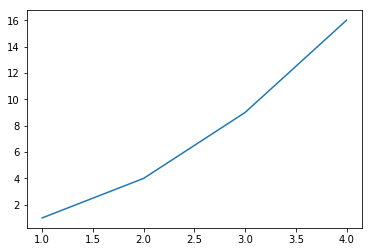

In [40]:
from matplotlib import pylab as plt

plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.show()

In [44]:
x = np.arange(-10, 10, 0.1)

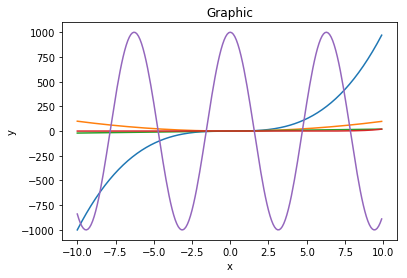

In [76]:
y1 = x ** 3
y2 = x ** 2
y3 = x * 2
y4 = np.exp(x) * 0.001
y5 = np.cos(x) * 1000

plt.title('Graphic')
plt.xlabel('x')
plt.ylabel('y')
# plt.legend()

plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)
plt.plot(x, y4)
plt.plot(x, y5)
plt.savefig('2.png')
plt.savefig('1.pdf')
plt.show()

In [74]:
plt.savefig('1.png')

## Задание по Matplotlib
1. Добавьте подписи к осям и легенду к примеру выше (см. документацию)
1. Постройте график с 5 разными элементарными функциями и сделайте легенду к графику в TeXe
1. Сохраните рисунок в файл строчкой кода на Python

## Все вместе (numpy + scipy + matplotlib)

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

In [2]:
np.random.seed(42)

In [3]:
np.random.RandomState(42)

In [4]:
x = np.arange(0, 10, 2)
y = np.exp(-x/3.0) + np.random.randn(len(x)) * 0.05

print x[:5]
print y[:5]

[0 2 4 6 8]
[ 1.02483571  0.5065039   0.29598157  0.21148678  0.05777578]


In [5]:
f = interpolate.interp1d(x, y, kind='quadratic')
xnew = np.arange(0, 8, 0.1)
ynew = f(xnew)

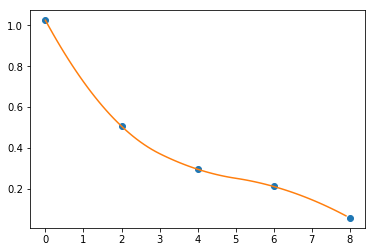

In [6]:
plt.plot(x, y, 'o', xnew, ynew, '-')
plt.show()

## Задание на Numpy+Matplotlib

1. Сгенерируйте массив из 500 точек на плоскости с координатами $(x, y)$, такими, что $x$ меняется от -1 до 1, а $y = 2x - 1 + \varepsilon$, где $\varepsilon \sim \mathcal{N}(0, 0.1)$
2. Сгенерируйте массив из 100 точек на плоскости с координатами $(x, y)$, такими, что $x$ меняется от -1 до 1, а $y = 1 + \varepsilon$, где $\varepsilon \sim \mathcal{N}(0, 0.1)$
3. Изобразите первый и второй массив точек на плоскости (используя два разных цвета), а также график функии $f(x) = 2x - 1$ (используя какой-нибудь третий цвет)

In [31]:
x = np.random.randn(500)

In [32]:
y = 2 * x - 1 + np.random.randn(500)

In [33]:
print x

[-0.40807537 -2.03812454 -1.00808631 -1.87079192 -0.35151348  0.01841838
  1.67643731  0.32692737 -0.21910053  0.82940558]


In [34]:
print y

[-4.02728606 -4.84063451 -2.24530743 -6.22017009 -0.55927292 -0.62466683
  1.93758671  0.28663661  0.8324918   0.84067742]


In [35]:
r = [(x[i], y[i]) for i in range(0, len(x))]

In [36]:
print r

[(-0.40807537302155139, -4.0272860550509879), (-2.0381245351778539, -4.8406345122471421), (-1.0080863109174041, -2.2453074279478411), (-1.8707919210258557, -6.2201700878315531), (-0.35151348404130867, -0.55927292487568825), (0.018418379189551699, -0.6246668341264825), (1.6764373122752827, 1.9375867106497642), (0.32692737376416264, 0.28663661363461013), (-0.21910052880886424, 0.83249180018666746), (0.82940558118348917, 0.84067741742547353)]


<function matplotlib.pyplot.show>

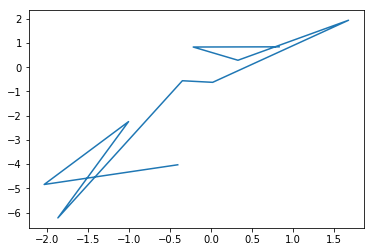

In [38]:
plt.plot(x, y)
plt.show